# fbb skeleton notebook for PUI2017 HW6

In [1]:
from __future__ import print_function, division
#import geopandas as gp  ##Couldn't manage to use geopandas
import pandas as pd
import pylab as pl
import os
import json
import seaborn
import statsmodels.formula.api as smf
import statsmodels.api as sm
if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
PUIdata = os.getenv('PUIDATA')
PUIdata

'/home/cusp/rls672/PUIdata'

**Data accessiable here:**
* https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z
* https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page 

In [3]:
nrg = pd.read_csv("https://raw.githubusercontent.com/scheids1/PUI2017_rls672/master/HW6_rls672/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
bsize = pd.read_csv("https://raw.githubusercontent.com/scheids1/PUI2017_rls672/master/HW6_rls672/MN.csv")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Alternative way to get data
#nrg = pd.read_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
#bsize = pd.read_csv(os.getenv("PUIDATA") + "/Manhattan/MN.csv")

In [5]:
nrg.columns

Index([u'Record Number', u'BBL', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Postcode',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'Latitude', u'Longitude', u'Community Board', u'Council District',
       u'Census Tract', u'BI

In [6]:
nrg = nrg[['BBL', 'Postcode', 'Reported Property Floor Area (Building(s)) (ft²)', 'Borough', 
           'DOF Number of Buildings', 'Site EUI(kBtu/ft2)']]
nrg.head()

,BBL,Postcode,Reported Property Floor Area (Building(s)) (ft²),Borough,DOF Number of Buildings,Site EUI(kBtu/ft2)
0,1.000410e+09,NaN,918919,Manhattan,NaN,NaN
1,4.021460e+09,11375.0,NaN,Queens,1.0,NaN
2,2.027620e+09,NaN,64200,Bronx,NaN,NaN
3,1.006700e+09,10001.0,NaN,Manhattan,1.0,NaN
4,2.048300e+09,NaN,50000,Bronx,NaN,NaN


In [7]:
nrg.columns

Index([u'BBL', u'Postcode',
       u'Reported Property Floor Area (Building(s)) (ft²)', u'Borough',
       u'DOF Number of Buildings', u'Site EUI(kBtu/ft2)'],
      dtype='object')

In [8]:
nrg.columns = ['BBL', 'ZipCode', 'Reported Property Floor Area (Building(s)) (ft²)', 'Borough', 
               'DOF Number of Buildings', 'SiteEUI']

In [9]:
nrg = nrg[nrg['Borough'] == 'Manhattan']

In [10]:
nrg.head()

,BBL,ZipCode,Reported Property Floor Area (Building(s)) (ft²),Borough,DOF Number of Buildings,SiteEUI
0,1.000410e+09,NaN,918919,Manhattan,NaN,NaN
3,1.006700e+09,10001.0,NaN,Manhattan,1.0,NaN
15,1.004370e+09,10009.0,NaN,Manhattan,1.0,NaN
16,1.013110e+09,10022.0,330000,Manhattan,1.0,125.4
18,1.006460e+09,NaN,69160,Manhattan,NaN,NaN


In [11]:
bsize.columns

Index([u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'SanitBoro', u'SanitDistrict', u'SanitSub', u'Address',
       u'ZoneDist1', u'ZoneDist2', u'ZoneDist3', u'ZoneDist4', u'Overlay1',
       u'Overlay2', u'SPDist1', u'SPDist2', u'SPDist3', u'LtdHeight',
       u'SplitZone', u'BldgClass', u'LandUse', u'Easements', u'OwnerType',
       u'OwnerName', u'LotArea', u'BldgArea', u'ComArea', u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'AreaSource', u'NumBldgs', u'NumFloors',
       u'UnitsRes', u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront',
       u'BldgDepth', u'Ext', u'ProxCode', u'IrrLotCode', u'LotType',
       u'BsmtCode', u'AssessLand', u'AssessTot', u'ExemptLand', u'ExemptTot',
       u'YearBuilt', u'YearAlter1', u'YearAlter2', u'HistDist', u'Landmark',
       u'BuiltFAR', u'ResidFAR', u'CommFAR', u'

In [12]:
bsize = bsize[['BBL', 'ZipCode', 'UnitsRes', 'UnitsTotal', 'YearBuilt']]
bsize.head()

,BBL,ZipCode,UnitsRes,UnitsTotal,YearBuilt
0,1.000010e+09,10004.0,0,0,1900
1,1.000010e+09,10004.0,0,0,1900
2,1.000010e+09,10004.0,0,0,1900
3,1.000010e+09,10004.0,0,0,0
4,1.000010e+09,10004.0,0,0,0


## exploratory analysis

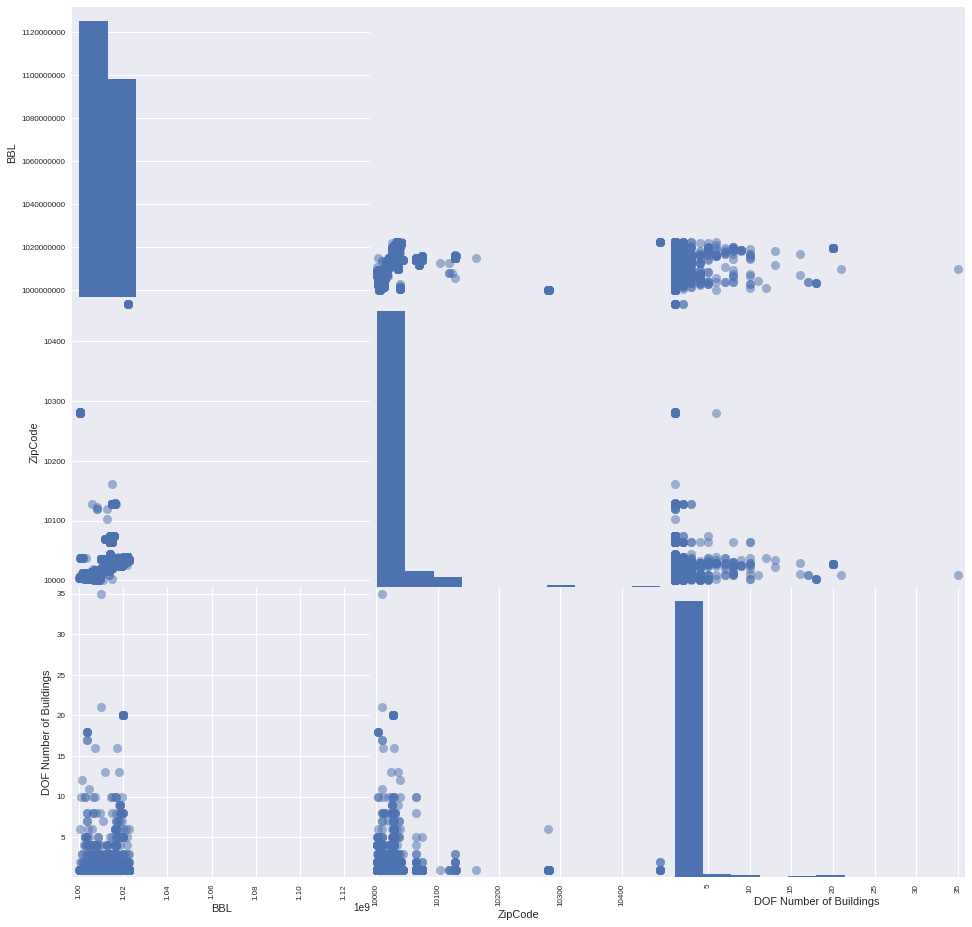

In [13]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16));

#### By scattering plotting all the variables against each other, you could potentially identify relationships that may be interesting. 

In [14]:
nrg.dtypes

BBL                                                 float64
ZipCode                                             float64
Reported Property Floor Area (Building(s)) (ft²)     object
Borough                                              object
DOF Number of Buildings                             float64
SiteEUI                                              object
dtype: object

In [15]:
def tonumeric(x): 
    x = pd.to_numeric(x, errors='coerce') 
    return x

In [16]:
nrg['SiteEUI'] = nrg['SiteEUI'].apply(tonumeric)
nrg['Reported Property Floor Area (Building(s)) (ft²)'] = nrg['Reported Property Floor Area (Building(s)) (ft²)'].apply(tonumeric)

In [17]:
nrg.dtypes

BBL                                                 float64
ZipCode                                             float64
Reported Property Floor Area (Building(s)) (ft²)    float64
Borough                                              object
DOF Number of Buildings                             float64
SiteEUI                                             float64
dtype: object

In [18]:
print (nrg['SiteEUI'].astype(float))
print (bsize.BBL.astype(float))

0            NaN
3            NaN
15           NaN
16         125.4
18           NaN
24           NaN
25           NaN
28           NaN
29           NaN
31           NaN
40           NaN
42           NaN
43           NaN
44         154.9
50           NaN
51           NaN
52           NaN
53           NaN
64         122.3
65         117.0
66           NaN
67           NaN
76          82.1
77         137.7
78         103.2
79          74.0
82         130.0
83         138.3
84       56909.0
85          88.2
          ...   
16078        NaN
16079        NaN
16080        NaN
16092        NaN
16093        NaN
16094        NaN
16095        NaN
16096        NaN
16097        NaN
16098        NaN
16099        NaN
16100        NaN
16101        NaN
16102        NaN
16105        NaN
16106        NaN
16107        NaN
16111        NaN
16113        NaN
16130        NaN
16131        NaN
16132        NaN
16151        NaN
16152        NaN
16153        NaN
16163        NaN
16164        NaN
16165        N

In [19]:
indx = np.isnan(nrg['SiteEUI']).sum()
print ("invalid entries changed to NaN %d"%sum(indx))

invalid entries changed to NaN 1544


In [20]:
(bsize.BBL.values[0]), (nrg.BBL.values[0])

(1000010010.0, 1000410001.0)

In [21]:
bblnrgdata = pd.merge(nrg, bsize, on='BBL').dropna()
bblnrgdata.shape
bblnrgdata.head(10)

,BBL,ZipCode_x,Reported Property Floor Area (Building(s)) (ft²),Borough,DOF Number of Buildings,SiteEUI,ZipCode_y,UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,10022.0,330000.0,Manhattan,1.0,125.4,10022.0,0,56,1977
15,1.007660e+09,10011.0,59468.0,Manhattan,1.0,122.3,10011.0,0,8,1912
16,1.008150e+09,10018.0,364000.0,Manhattan,1.0,117.0,10018.0,0,24,1954
18,1.005050e+09,10013.0,235370.0,Manhattan,1.0,82.1,10013.0,0,24,1926
19,1.021420e+09,10032.0,64806.0,Manhattan,1.0,137.7,10032.0,54,62,1924
20,1.021750e+09,10040.0,62839.0,Manhattan,1.0,103.2,10040.0,75,85,1920
21,1.003360e+09,10002.0,98000.0,Manhattan,1.0,74.0,10002.0,128,128,1982
22,1.008070e+09,10001.0,204417.0,Manhattan,1.0,130.0,10001.0,0,10,1912
23,1.008580e+09,10016.0,60110.0,Manhattan,1.0,138.3,10016.0,56,61,1923
24,1.009688e+09,10016.0,457946.0,Manhattan,1.0,56909.0,10016.0,485,486,1984


In [22]:
bblnrgdata.columns

Index([u'BBL', u'ZipCode_x',
       u'Reported Property Floor Area (Building(s)) (ft²)', u'Borough',
       u'DOF Number of Buildings', u'SiteEUI', u'ZipCode_y', u'UnitsRes',
       u'UnitsTotal', u'YearBuilt'],
      dtype='object')

In [23]:
bblnrgdata = bblnrgdata[['BBL', 'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Number of Buildings', 'SiteEUI', 'UnitsRes', 'UnitsTotal', 'YearBuilt',]]
bblnrgdata.head()

,BBL,Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings,SiteEUI,UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,330000.0,1.0,125.4,0,56,1977
15,1.007660e+09,59468.0,1.0,122.3,0,8,1912
16,1.008150e+09,364000.0,1.0,117.0,0,24,1954
18,1.005050e+09,235370.0,1.0,82.1,0,24,1926
19,1.021420e+09,64806.0,1.0,137.7,54,62,1924


In [24]:
bblnrgdata2 = bblnrgdata[['BBL','SiteEUI', 'UnitsRes', 'UnitsTotal', 'YearBuilt',]]
bblnrgdata2.head(10)

,BBL,SiteEUI,UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,125.4,0,56,1977
15,1.007660e+09,122.3,0,8,1912
16,1.008150e+09,117.0,0,24,1954
18,1.005050e+09,82.1,0,24,1926
19,1.021420e+09,137.7,54,62,1924
20,1.021750e+09,103.2,75,85,1920
21,1.003360e+09,74.0,128,128,1982
22,1.008070e+09,130.0,0,10,1912
23,1.008580e+09,138.3,56,61,1923
24,1.009688e+09,56909.0,485,486,1984


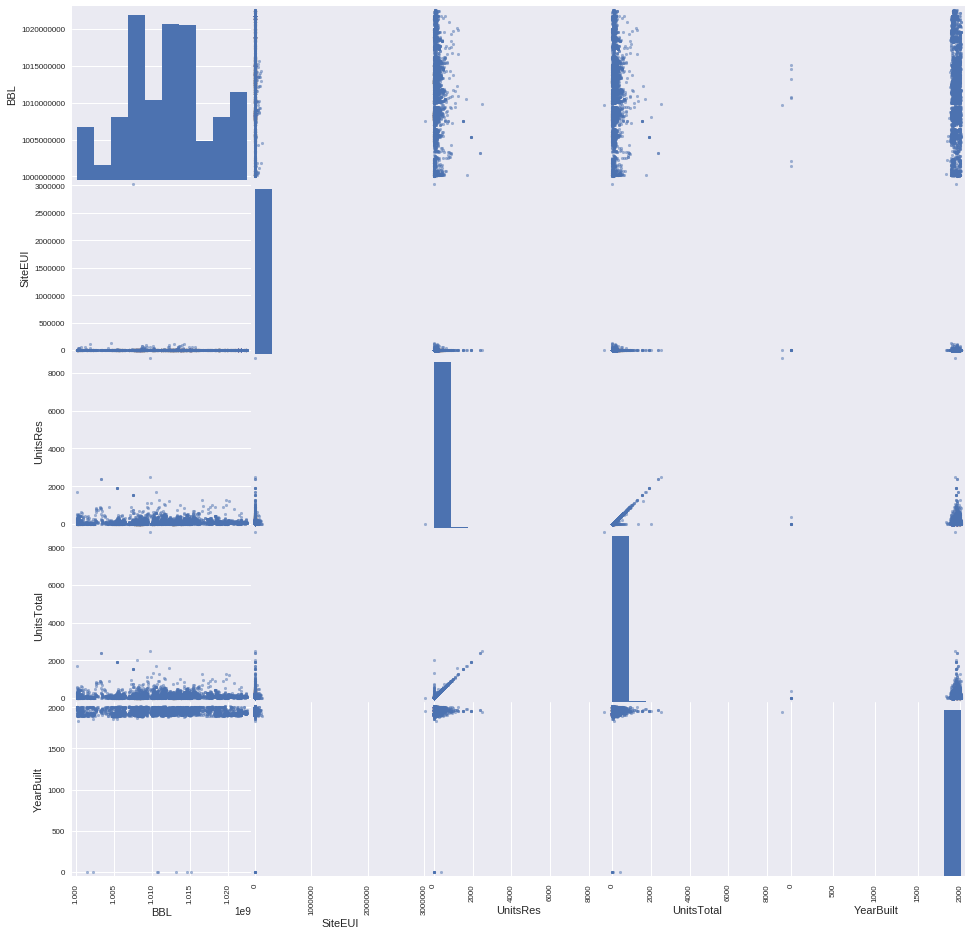

In [25]:
scatter_matrix (bblnrgdata2, s=30, figsize=(16, 16));

### Caption: The matrix visually demonstrates the relationships between all the variables in the dataframe. It can help determine what relationships warrant further exploration. 

In [26]:
bblnrgdata['TotalEUI'] = bblnrgdata['SiteEUI'] * bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)']
bblnrgdata.head()

,BBL,Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings,SiteEUI,UnitsRes,UnitsTotal,YearBuilt,TotalEUI
2,1.013110e+09,330000.0,1.0,125.4,0,56,1977,41382000.0
15,1.007660e+09,59468.0,1.0,122.3,0,8,1912,7272936.4
16,1.008150e+09,364000.0,1.0,117.0,0,24,1954,42588000.0
18,1.005050e+09,235370.0,1.0,82.1,0,24,1926,19323877.0
19,1.021420e+09,64806.0,1.0,137.7,54,62,1924,8923786.2


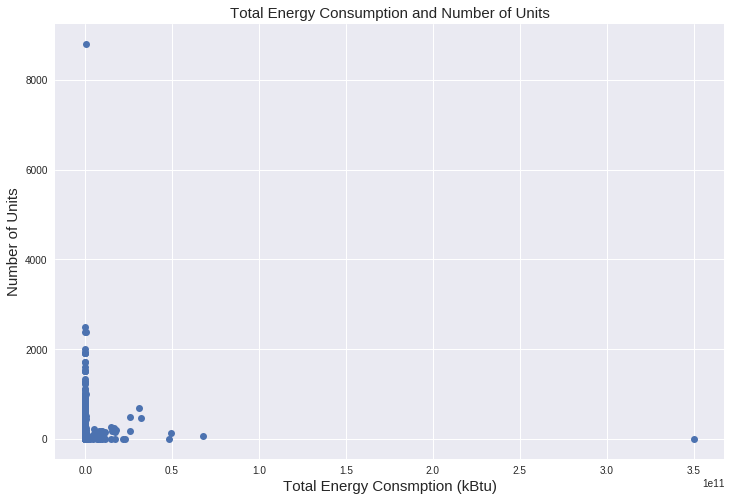

In [27]:
fig = figsize(12,8)
ax=subplot()
pl.plot(bblnrgdata['TotalEUI'], bblnrgdata['UnitsTotal'], 'o')
ax.set_xlabel("Total Energy Consmption (kBtu)", fontsize=15)
ax.set_ylabel('Number of Units', fontsize=15)
ax.set_title("Total Energy Consumption and Number of Units", fontsize=15)

#### Caption: Because of the range of values, it is difficult to derive any insights from this plot of energy vs units. 

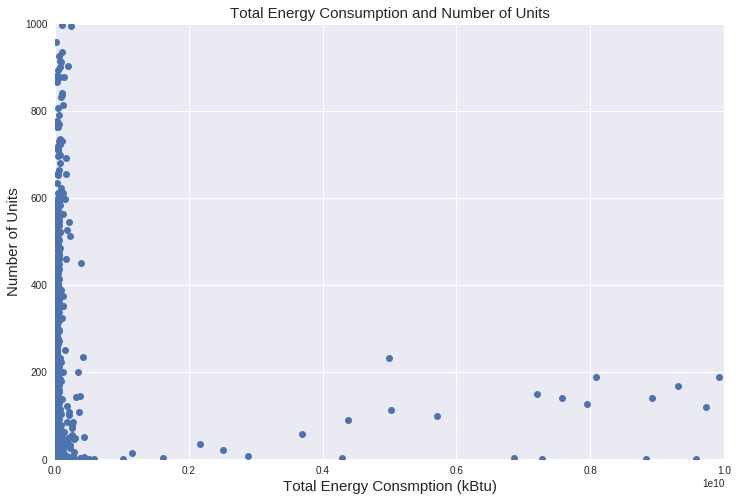

In [28]:
fig = figsize(12,8)
ax=subplot()
pl.plot(bblnrgdata['TotalEUI'], bblnrgdata['UnitsTotal'], 'o')
ax.set_xlim(1000,1e10)
ax.set_ylim(1,1000)
ax.set_xlabel("Total Energy Consmption (kBtu)", fontsize=15)
ax.set_ylabel('Number of Units', fontsize=15)
ax.set_title("Total Energy Consumption and Number of Units", fontsize=15)

#### Caption: By liminiting the axis and zooming it, you can start to see the relationship patterns between energy and units. 

In [29]:
bblnrgdataCut = bblnrgdata[(bblnrgdata.TotalEUI > 1000) * (bblnrgdata.UnitsTotal>=10) * 
                           (bblnrgdata.UnitsTotal<1000)]

bblnrgdataCut.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


,BBL,Reported Property Floor Area (Building(s)) (ft²),DOF Number of Buildings,SiteEUI,UnitsRes,UnitsTotal,YearBuilt,TotalEUI
2,1.013110e+09,330000.0,1.0,125.4,0,56,1977,41382000.0
16,1.008150e+09,364000.0,1.0,117.0,0,24,1954,42588000.0
18,1.005050e+09,235370.0,1.0,82.1,0,24,1926,19323877.0
19,1.021420e+09,64806.0,1.0,137.7,54,62,1924,8923786.2
20,1.021750e+09,62839.0,1.0,103.2,75,85,1920,6484984.8


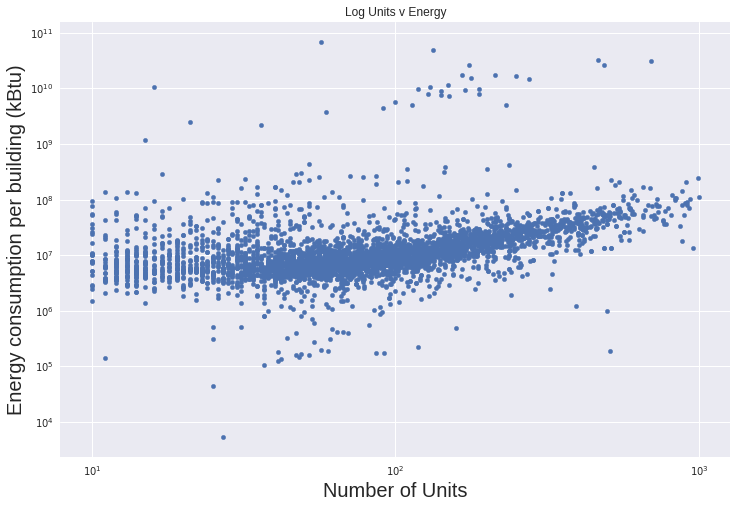

In [30]:
ax = bblnrgdataCut.plot(kind='scatter', y='TotalEUI', x='UnitsTotal', 
                   marker='o',  figsize=(12, 8), loglog=True)
ax.set_xlabel("Number of Units", fontsize=20)
ax.set_ylabel("Energy consumption per building (kBtu)", fontsize=20)
ax.set_title("Log Units v Energy")

#### Caption: By taking the log, you can see that the relationship between number of units and energy consumption. 

The logical assumption to make is that number of units impacts the amount of energy used. As the number of units increases, so to should the amount of energy consumed. 

In [31]:
X = sm.add_constant(np.log10(bblnrgdataCut.UnitsTotal))
linmodel = sm.OLS(np.log10(bblnrgdataCut.TotalEUI), X, missing='drop').fit()

In [32]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TotalEUI   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     799.8
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.38e-160
Time:                        23:26:18   Log-Likelihood:                -2365.2
No. Observations:                4008   AIC:                             4734.
Df Residuals:                    4006   BIC:                             4747.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.1050      0.034    180.957      0.000         6.039     6.171
UnitsTotal     0.4933      0.017     28.281      0.000         0.459     0.527
==============================================================================
Omnibus:                     2200.210   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46847.024
Skew:                           2.162   Prob(JB):                         0.00
Kurtosis:                      19.181   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

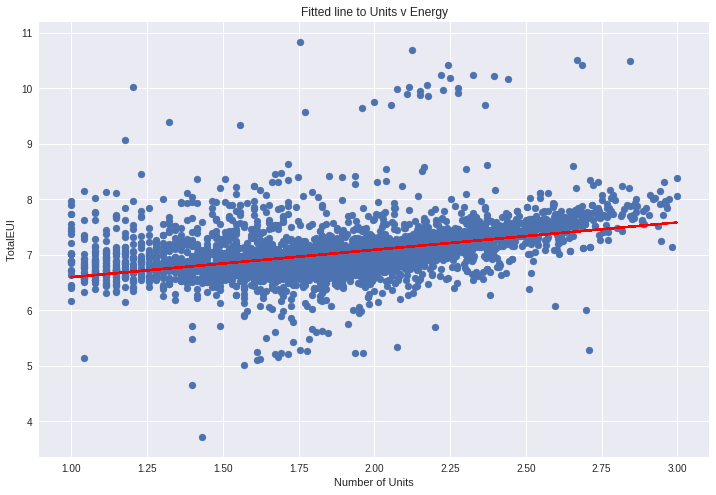

In [33]:
plt.scatter(np.log10(bblnrgdataCut.UnitsTotal), np.log10(bblnrgdataCut.TotalEUI))
plt.plot(np.log10(bblnrgdataCut.UnitsTotal), linmodel.predict(X), '-', c='r')
plt.xlabel("Number of Units")
plt.ylabel("TotalEUI")
plt.title("Fitted line to Units v Energy")

#### Caption: The line looks like a reasonable fit through the data. 

In [34]:
X2 = sm.add_constant(np.log10(bblnrgdataCut.TotalEUI))
linmodel2 = sm.OLS(np.log10(bblnrgdataCut.UnitsTotal), X2, missing='drop').fit()

In [35]:
X2.head()

,const,TotalEUI
2,1.0,7.616811
16,1.0,7.629287
18,1.0,7.286094
19,1.0,6.950549
20,1.0,6.811909


In [36]:
linmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     799.8
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.38e-160
Time:                        23:26:19   Log-Likelihood:                -1604.1
No. Observations:                4008   AIC:                             3212.
Df Residuals:                    4006   BIC:                             3225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4815      0.084     -5.720      0.000        -0.647    -0.316
TotalEUI       0.3374      0.012     28.281      0.000         0.314     0.361
==============================================================================
Omnibus:                      149.144   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.686
Skew:                          -0.481   Prob(JB):                     1.05e-36
Kurtosis:                       3.260   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

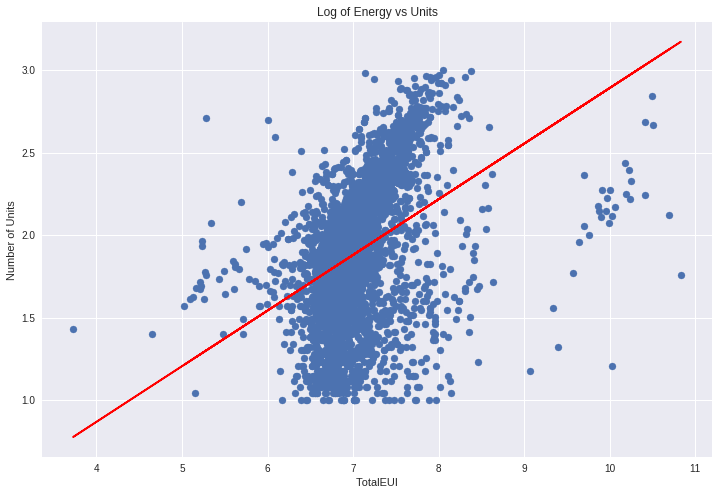

In [37]:
plt.scatter(np.log10(bblnrgdataCut.TotalEUI), np.log10(bblnrgdataCut.UnitsTotal))
plt.plot(np.log10(bblnrgdataCut.TotalEUI), linmodel2.predict(X2), '-', c='r')
plt.xlabel("TotalEUI")
plt.ylabel("Number of Units")
plt.title("Log of Energy vs Units")

#### Caption: This line does not look like a good fit for the data. 

In [38]:
linmodel.llf, linmodel2.llf

(-2365.2048486113904, -1604.1077205358438)

In [39]:
print ("LR STATISTICS: ", -2 * (linmodel.llf - linmodel2.llf))

LR STATISTICS:  1522.19425615


In [40]:
linmodel2.compare_lr_test(linmodel)

(1522.1942561510932, nan, 0.0)

chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$

In [41]:
errorsnrg = np.sqrt((bblnrgdataCut['Reported Property Floor Area (Building(s)) (ft\xc2\xb2)'])**2 +\
                (bblnrgdataCut['SiteEUI']**2))

errorsunits = np.sqrt(bblnrgdataCut.UnitsTotal)

In [42]:
errorsInLogNrg = np.abs(errorsnrg / bblnrgdataCut.TotalEUI / np.log(10))
errorsInLogUnits = np.abs(errorsunits / bblnrgdataCut.UnitsTotal / np.log(10))

bblnrgdataCut['errorsnrg'] = errorsInLogNrg
bblnrgdataCut['errorsunits'] = errorsInLogUnits

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Explanation of the errors: The errors had to be calculated with two variables, because we multiplied them to get the variable we are using here. 

In [43]:
X.head()

,const,UnitsTotal
2,1.0,1.748188
16,1.0,1.380211
18,1.0,1.380211
19,1.0,1.792392
20,1.0,1.929419


In [44]:
y1 = X.UnitsTotal
y1_fit = linmodel2.params[0] + linmodel2.params[1] * X2.TotalEUI

chisq = (((y1 - y1_fit)**2) / errorsInLogUnits**2).sum()
chisq

450338.56286477088

In [45]:
y2 = X2.TotalEUI
y2_fit = linmodel.params[0] + linmodel.params[1] * X.UnitsTotal

chisq2 = (((y2 - y2_fit)**2) / errorsInLogNrg**2).sum()
chisq2

3506018253907.0713

The numbers are very, very big and thus neither model is probably very good. 

Can you compare these models with the likelihood ratio test? No, because they are not nested. 

# Polynomials

In [46]:
X2.head()

,const,TotalEUI
2,1.0,7.616811
16,1.0,7.629287
18,1.0,7.286094
19,1.0,6.950549
20,1.0,6.811909


In [47]:
dfLogs = pd.concat([X['UnitsTotal'], X2['TotalEUI']], axis=1)
dfLogs = dfLogs.sort_values('TotalEUI')
dfLogs.head()

,UnitsTotal,TotalEUI
3834,1.431364,3.727866
3840,1.397940,4.650319
5794,1.568202,5.021189
5748,1.612784,5.099424
5802,1.623249,5.132516


In [48]:
poly = smf.ols(formula = 'dfLogs.UnitsTotal ~ I(dfLogs.TotalEUI**2) + dfLogs.TotalEUI', data=dfLogs)
model2 = poly.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      dfLogs.UnitsTotal   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     456.5
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          2.50e-179
Time:                        23:26:19   Log-Likelihood:                -1557.3
No. Observations:                4008   AIC:                             3121.
Df Residuals:                    4005   BIC:                             3140.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -4.4190      0.413    -10.690      0.000        -5.229    -3.608
I(dfLogs.TotalEUI ** 2)    -0.0711      0.007     -9.724      0.000        -0.085    -0.057
dfLogs.TotalEUI             1.3999      0.110     12.738      0.000         1.184     1.615
==============================================================================
Omnibus:                      119.956   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.785
Skew:                          -0.401   Prob(JB):                     5.39e-30
Kurtosis:                       3.404   Cond. No.                     3.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
dfLogs.head()

,UnitsTotal,TotalEUI
3834,1.431364,3.727866
3840,1.397940,4.650319
5794,1.568202,5.021189
5748,1.612784,5.099424
5802,1.623249,5.132516


In [50]:
model2.llf

-1557.346201455654

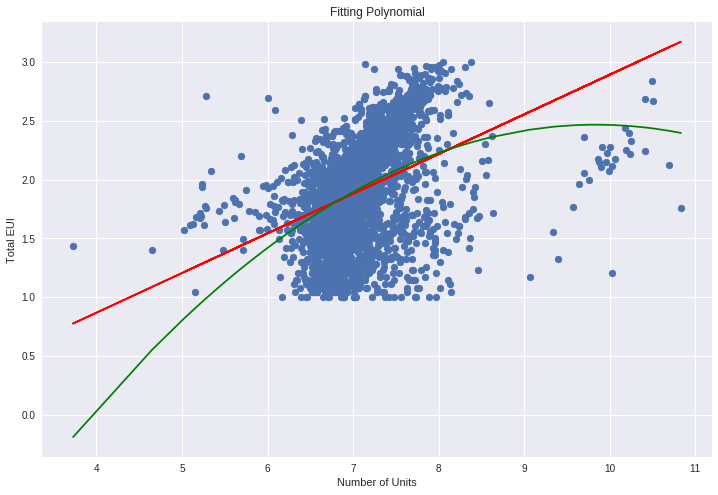

In [51]:
plt.scatter(np.log10(bblnrgdataCut.TotalEUI), np.log10(bblnrgdataCut.UnitsTotal))
plt.plot(np.log10(bblnrgdataCut.TotalEUI), linmodel2.predict(X2), '-', c='r')
plt.plot(dfLogs.TotalEUI, model2.predict(dfLogs), color="green")
plt.xlabel("Number of Units")
plt.ylabel("Total EUI")
plt.title("Polynomial Fit")
plt.title("Fitting Polynomial")

#### The polynomial doesn't look like a great fit either. The model is not a great model. 